In [9]:
!kaggle datasets download -d "ahmedhaytham/where-am-i"

100% 4.05G/4.06G [02:00<00:00, 49.2MB/s]
100% 4.06G/4.06G [02:00<00:00, 36.1MB/s]


In [10]:
!unzip where-am-i.zip

Archive:  where-am-i.zip
  inflating: Cairo 4K - Night Drive - Driving Downtown.mp4  
  inflating: Data/Val/cairo/cairo_frame0.jpg  
  inflating: Data/Val/cairo/cairo_frame1020.jpg  
  inflating: Data/Val/cairo/cairo_frame1050.jpg  
  inflating: Data/Val/cairo/cairo_frame1080.jpg  
  inflating: Data/Val/cairo/cairo_frame1110.jpg  
  inflating: Data/Val/cairo/cairo_frame1140.jpg  
  inflating: Data/Val/cairo/cairo_frame1170.jpg  
  inflating: Data/Val/cairo/cairo_frame120.jpg  
  inflating: Data/Val/cairo/cairo_frame1200.jpg  
  inflating: Data/Val/cairo/cairo_frame1230.jpg  
  inflating: Data/Val/cairo/cairo_frame1260.jpg  
  inflating: Data/Val/cairo/cairo_frame1290.jpg  
  inflating: Data/Val/cairo/cairo_frame1320.jpg  
  inflating: Data/Val/cairo/cairo_frame1350.jpg  
  inflating: Data/Val/cairo/cairo_frame1380.jpg  
  inflating: Data/Val/cairo/cairo_frame1410.jpg  
  inflating: Data/Val/cairo/cairo_frame1440.jpg  
  inflating: Data/Val/cairo/cairo_frame1470.jpg  
  inflating: Data/

In [303]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [99]:
train_generator = train_datagen.flow_from_directory("/content/Data/train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 1800 images belonging to 3 classes.


In [100]:
val_generator = val_datagen.flow_from_directory(
    "/content/Data/Val",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 300 images belonging to 3 classes.


In [101]:
from tensorflow.keras.layers import *
from tensorflow import keras
from tensorflow.keras import Sequential

model = Sequential(name="Emirhan_Sign_Language_Detection_Deep_Learning")

model.add(Conv2D(256,2,2,padding="valid",input_shape=(128,128,1)))
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(256,2,2,padding="valid",input_shape=(128,128,1)))
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(256,2,2,padding="valid",input_shape=(128,128,1)))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(256,2,2,padding="valid",input_shape=(128,128,1)))
model.add(SpatialDropout2D(0.2))
model.add(LeakyReLU())
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(2))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(512,2,2,padding="valid"))
model.add(Conv2D(512,2,2,padding="valid"))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(1024,2,2,padding="valid"))
model.add(Conv2D(1024,2,2,padding="valid"))
model.add(Conv2D(1024,2,2,padding="valid"))
model.add(LeakyReLU())
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(2048,2,padding="valid"))
model.add(Conv2D(2048,2,padding="valid"))
model.add(Conv2D(2048,2,padding="valid"))
model.add(Conv2D(2048,2,padding="valid"))
model.add(SpatialDropout2D(0.2))
model.add(Conv2D(1024,2,padding="valid"))
model.add(MaxPool2D(2))
model.add(Conv2D(1024,2,padding="valid"))
model.add(Conv2D(1024,2,padding="valid"))
model.add(MaxPool2D(2))
model.add(Conv2D(1024,2,padding="valid"))
model.add(PReLU())
model.add(SpatialDropout2D(0.2))
model.add(MaxPool2D(3))

model.add(Flatten())

model.add(Dense(64))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(PReLU())
model.add(Dropout(0.2))
model.add(Dense(3,activation="tanh"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [102]:
model.fit(train_generator,
          validation_data=val_generator,
          batch_size=256,
          validation_batch_size=128,
          epochs=64,
          shuffle=True,
          callbacks=[keras.callbacks.ModelCheckpoint("/content/model/model_{epoch}.h5")])

Epoch 1/64
15/15 [==============================] - 34s 2s/step - loss: 1.3751 - accuracy: 0.4772 - val_loss: 2.1498 - val_accuracy: 0.3333
Epoch 2/64
15/15 [==============================] - 31s 2s/step - loss: 0.9602 - accuracy: 0.5517 - val_loss: 0.8285 - val_accuracy: 0.6200
Epoch 3/64
15/15 [==============================] - 31s 2s/step - loss: 0.5896 - accuracy: 0.7206 - val_loss: 0.7032 - val_accuracy: 0.6600
Epoch 4/64
15/15 [==============================] - 32s 2s/step - loss: 0.4747 - accuracy: 0.7817 - val_loss: 0.8538 - val_accuracy: 0.6200
Epoch 5/64
15/15 [==============================] - 32s 2s/step - loss: 0.4037 - accuracy: 0.8072 - val_loss: 0.7721 - val_accuracy: 0.6600
Epoch 6/64
15/15 [==============================] - 32s 2s/step - loss: 0.3196 - accuracy: 0.8811 - val_loss: 0.3414 - val_accuracy: 0.8600
Epoch 7/64
15/15 [==============================] - 32s 2s/step - loss: 0.1145 - accuracy: 0.9628 - val_loss: 0.4561 - val_accuracy: 0.7867
Epoch 8/64
15/15 [==

KeyboardInterrupt: ignored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [182]:
from tensorflow.keras.models import load_model
model = load_model("/content/model/model_8.h5")

In [208]:
from keras.preprocessing.image import ImageDataGenerator

test = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zca_epsilon=99) 
test_generator = test.flow_from_directory("/content/Data/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 600 images belonging to 3 classes.


In [186]:
model.evaluate(test_generator)

5/5 [==============================] - 9s 2s/step - loss: 0.1088 - accuracy: 0.9583


[0.10878629982471466, 0.9583333134651184]

In [210]:
model.evaluate(val_generator)

3/3 [==============================] - 4s 1s/step - loss: 0.0717 - accuracy: 0.9733


[0.07167494297027588, 0.9733333587646484]

In [211]:
model.evaluate(train_generator)

15/15 [==============================] - 25s 2s/step - loss: 0.0207 - accuracy: 0.9939


[0.020671382546424866, 0.9938889145851135]

In [295]:
def prediction(data,model):
  pred = model.predict(data)
  if pred[0][0] > pred[0][1] or pred[0][2]:
    print("""Predict Image is Cairo!
  City Recognition Artificial Intelligence Software was developed by Emirhan BULUT.""")
  elif pred[0][1] > pred[0][0] or pred[0][2]:
    print("""Predict Image is Moscow!
  City Recognition Artificial Intelligence Software was developed by Emirhan BULUT.""")
  else:
    print("""Predict Image is Paris!
  City Recognition Artificial Intelligence Software was developed by Emirhan BULUT.""")

In [298]:
from keras.preprocessing.image import ImageDataGenerator

predict = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zca_epsilon=99) 
predict_generator = predict.flow_from_directory(
    "/content/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 1 images belonging to 1 classes.


In [299]:
prediction(predict_generator,model)

Predict Image is Paris!
  City Recognition Artificial Intelligence Software was developed by Emirhan BULUT.


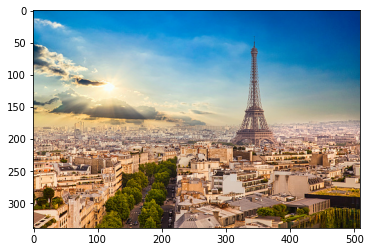

In [230]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("paris.jpg")
plt.imshow(im)
plt.show()

In [292]:
from keras.preprocessing.image import ImageDataGenerator

predict = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zca_epsilon=99) 
predict_generator = predict.flow_from_directory(
    "/content/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 1 images belonging to 1 classes.


In [296]:
prediction(predict_generator,model)

Predict Image is Moscow!
  City Recognition Artificial Intelligence Software was developed by Emirhan BULUT.


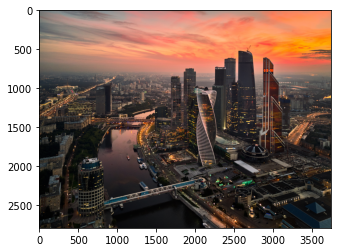

In [233]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("moscow.jpg")
plt.imshow(im)
plt.show()

In [300]:
from keras.preprocessing.image import ImageDataGenerator

predict = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zca_epsilon=99) 
predict_generator = predict.flow_from_directory(
    "/content/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False))

Found 1 images belonging to 1 classes.


In [301]:
prediction(predict_generator,model)

Predict Image is Cairo!
  City Recognition Artificial Intelligence Software was developed by Emirhan BULUT.


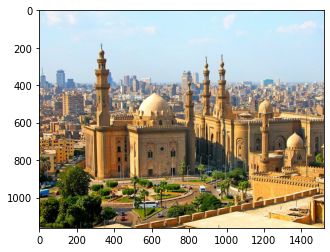

In [290]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("cairo.jpg")
plt.imshow(im)
plt.show()